In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_financial = pd.read_csv('/content/financial_health_analysis_dataset.csv', parse_dates=['Date'])
df_financial = df_financial.sort_values('Date')

In [3]:
df_financial.head()

,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48


In [4]:
df_financial.shape

(20000, 12)

In [5]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              20000 non-null  datetime64[ns]
 1   Revenue           20000 non-null  int64         
 2   Expenses          20000 non-null  int64         
 3   Profit            20000 non-null  int64         
 4   Cash Flow         20000 non-null  int64         
 5   Debt              20000 non-null  int64         
 6   Assets            20000 non-null  int64         
 7   Liabilities       20000 non-null  int64         
 8   Marketing Spend   20000 non-null  int64         
 9   Employee Count    20000 non-null  int64         
 10  Tax Paid          20000 non-null  int64         
 11  Operational Cost  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.8 MB


**a) Data Cleaning**

In [6]:
df_financial.isnull().sum()

,0
Date,0
Revenue,0
Expenses,0
Profit,0
Cash Flow,0
Debt,0
Assets,0
Liabilities,0
Marketing Spend,0
Employee Count,0


In [7]:
#Checking Outliers
numeric_cols = df_financial.select_dtypes(include=np.number).columns

#Z-score method
print("\nZ-score method outliers:")
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df_financial[col]))
    outliers = df_financial[col][z_scores > 3]
    print(f"{col}: {len(outliers)} outliers")


Z-score method outliers:
Revenue: 0 outliers
Expenses: 0 outliers
Profit: 0 outliers
Cash Flow: 0 outliers
Debt: 0 outliers
Assets: 0 outliers
Liabilities: 0 outliers
Marketing Spend: 0 outliers
Employee Count: 0 outliers
Tax Paid: 0 outliers
Operational Cost: 0 outliers


In [8]:
#IQR Method
print("\nIQR method outliers:")
for col in numeric_cols:
    Q1 = df_financial[col].quantile(0.25)
    Q3 = df_financial[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_financial[(df_financial[col] < lower_bound) | (df_financial[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


IQR method outliers:
Revenue: 0 outliers
Expenses: 0 outliers
Profit: 0 outliers
Cash Flow: 0 outliers
Debt: 0 outliers
Assets: 0 outliers
Liabilities: 0 outliers
Marketing Spend: 0 outliers
Employee Count: 0 outliers
Tax Paid: 0 outliers
Operational Cost: 0 outliers


* There are no null values in the dataset

* There are no outliers present in the dataset

**b) Exploratory Data Analysis**

In [9]:
print("=== Descriptive Statistics ===")
finance_df = df_financial.describe().T
finance_df['mean'] = df_financial.mean()
finance_df['std'] = df_financial.std()
finance_df['median'] = df_financial.median()
finance_df['mode'] = df_financial.mode().iloc[0]
finance_df[['mean','std','median','mode']]

=== Descriptive Statistics ===


,mean,std,median,mode
Date,2027-05-18 12:00:00,5773 days 15:31:43.189770432,2027-05-18 12:00:00,2000-01-01 00:00:00
Revenue,59508.5451,23209.165749,59138.5,43386.0
Expenses,47249.8364,18862.986125,46881.0,21486.0
Profit,12258.7087,29843.89368,12519.0,-4743.0
Cash Flow,12248.08865,29982.651637,12370.5,-9583.0
Debt,30082.9623,11532.833832,30209.0,11071.0
Assets,99968.18915,28822.209403,100105.5,60559.0
Liabilities,44978.94715,14505.592213,44953.0,54287.0
Marketing Spend,12483.3725,4340.376592,12464.0,5345.0
Employee Count,274.78635,130.003427,274.0,450.0


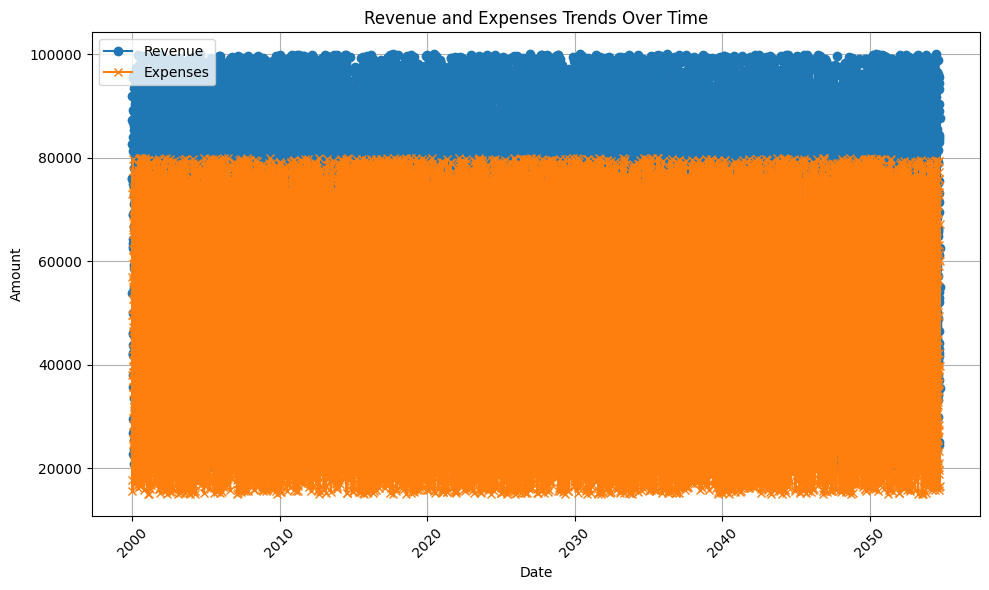

In [10]:
# ==== Line Charts for Revenue and Expenses Trends ====
plt.figure(figsize=(10, 6))
plt.plot(df_financial['Date'], df_financial['Revenue'], label='Revenue', marker='o')
plt.plot(df_financial['Date'], df_financial['Expenses'], label='Expenses', marker='x')
plt.title('Revenue and Expenses Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

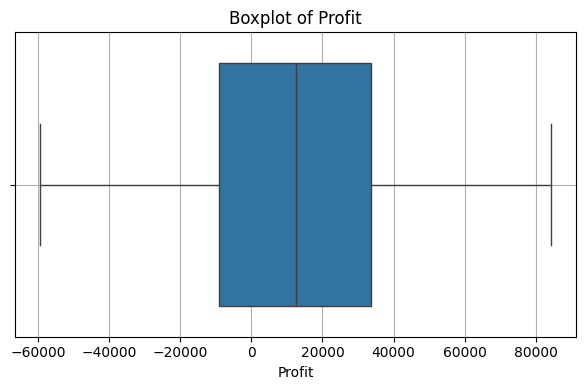

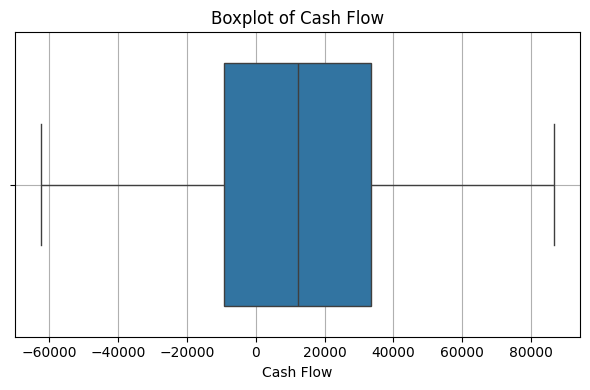

In [11]:
# ==== Boxplots for Profit and Cash Flow ====
for col in ['Profit', 'Cash Flow']:
    if col in df_financial.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_financial[col])
        plt.title(f'Boxplot of {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [12]:
#correlations between revenue, expenses, profit and cash flow
df_corr = df_financial[['Revenue', 'Expenses', 'Profit', 'Cash Flow']].corr()
df_corr

,Revenue,Expenses,Profit,Cash Flow
Revenue,1.000000,0.004362,0.774928,0.771063
Expenses,0.004362,1.000000,-0.628663,-0.626041
Profit,0.774928,-0.628663,1.000000,0.995337
Cash Flow,0.771063,-0.626041,0.995337,1.000000


<Axes: >

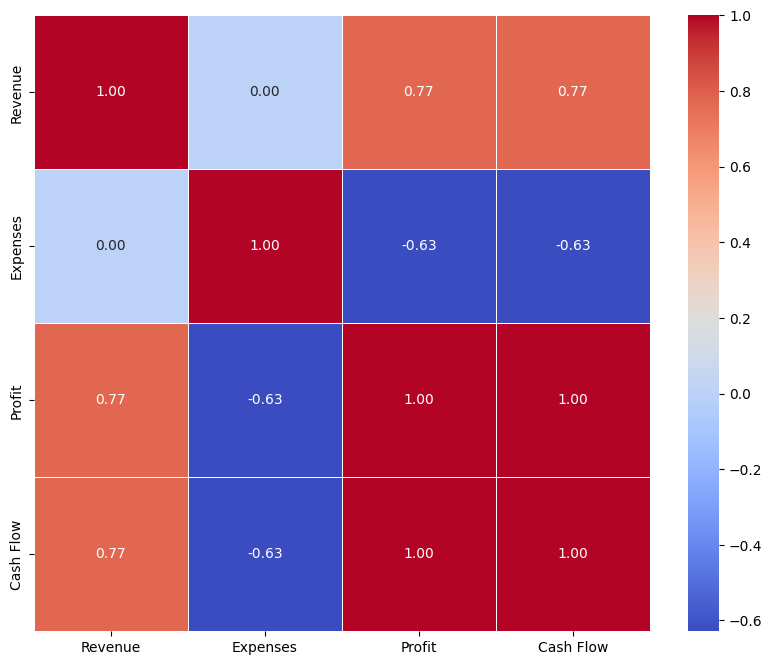

In [13]:
#Plot for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr,annot=True,fmt=".2f",linewidths=.5,cmap="coolwarm",square=True)

**The Positive Correlated features are**

1) revenue and cash flow - 0.77

2) profit and cash flow - 1.00

3) Profit and revenue - 0.77

**The Negative Correlated features are**

1) Expenses and Cash flow - -0.63

2) Profit and expenses - -0.63


**Hypothesis Testing**

**Scenario - 1**

In [14]:
#Testing if the average monthly profit is greater than a predefined benchmark value
benchmark_profit = 10000
average_monthly_profit = df_financial['Profit'].mean()

print(f"Average Monthly Profit: ${average_monthly_profit:.2f}")
print(f"Benchmark Profit: ${benchmark_profit}")

if average_monthly_profit > benchmark_profit:
    print("The average monthly profit is greater than the benchmark.")
else:
    print("The average monthly profit is not greater than the benchmark.")

Average Monthly Profit: $12258.71
Benchmark Profit: $10000
The average monthly profit is greater than the benchmark.


**Scenario - 2**

In [15]:
#Testing if the average revenue and expenses are significantly different using Z-test, or t-tests
test_result = stats.ttest_ind(df_financial['Revenue'], df_financial['Expenses']) #Perform independent samples

#p-value
p_value = test_result.pvalue

print(f"\nIndependent Samples t-test result:")
print(f"Test statistic: {test_result.statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level

if p_value < alpha:
  print(f"\nSince the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
  print("There is a statistically significant difference between the average revenue and average expenses.")
else:
  print(f"\nSince the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
  print("There is no statistically significant difference between the average revenue and average expenses.")


Independent Samples t-test result:
Test statistic: 57.9662
P-value: 0.0000

Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant difference between the average revenue and average expenses.


**Trend Analysis**

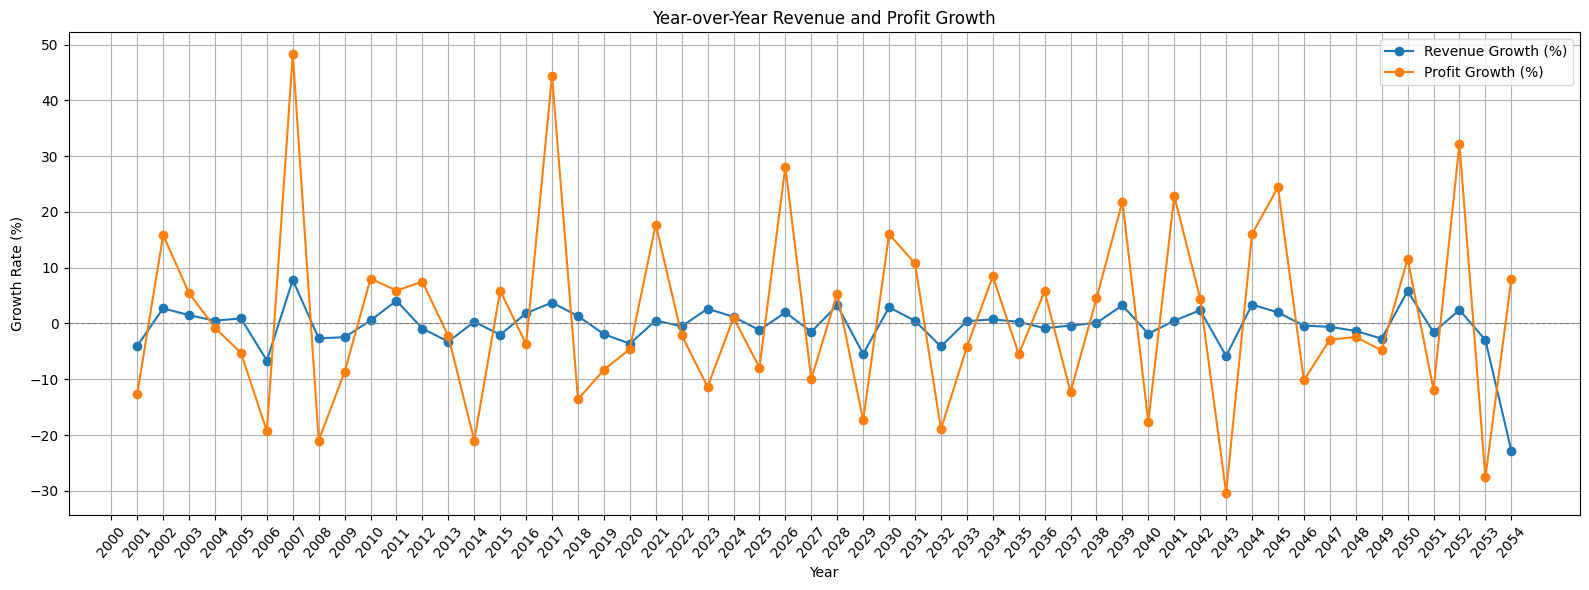

In [20]:
# Aggregate data by year
df_financial['Year'] = df_financial['Date'].dt.year
df_yearly = df_financial.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()

# Calculate year-over-year growth rates
df_yearly['Revenue_Growth'] = df_yearly['Revenue'].pct_change() * 100
df_yearly['Profit_Growth'] = df_yearly['Profit'].pct_change() * 100

# Print the yearly data with growth rates
#print("Year-over-Year Revenue and Profit Growth:")
#print(df_yearly)

# Identify periods of significant change
revenue_threshold = 10
profit_threshold = 10
significant_revenue_growth_years = df_yearly[df_yearly['Revenue_Growth'] > revenue_threshold]['Year']
significant_profit_growth_years = df_yearly[df_yearly['Profit_Growth'] > profit_threshold]['Year']
#print(f"\nYears with significant revenue growth (>{revenue_threshold}%): {list(significant_revenue_growth_years)}")
#print(f"Years with significant profit growth (>{profit_threshold}%): {list(significant_profit_growth_years)}")

# Visualize the year-over-year growth
plt.figure(figsize=(16, 6))
plt.plot(df_yearly['Year'], df_yearly['Revenue_Growth'], marker='o', label='Revenue Growth (%)')
plt.plot(df_yearly['Year'], df_yearly['Profit_Growth'], marker='o', label='Profit Growth (%)')
plt.title('Year-over-Year Revenue and Profit Growth')
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(df_yearly['Year'])
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

**Key Insights**

* Volatility in Profit Growth: Profit growth is much more volatile than revenue growth, with frequent sharp increases and declines.

* Revenue Growth is More Stable: Revenue growth fluctuates within a narrower band, showing a generally more stable business top line.

* Negative Growth Periods: Both revenue and profit dip into negative values in multiple years, indicating contraction periods.

* No Highlighted Extremes: It's hard to quickly spot the most impactful years without additional cues.



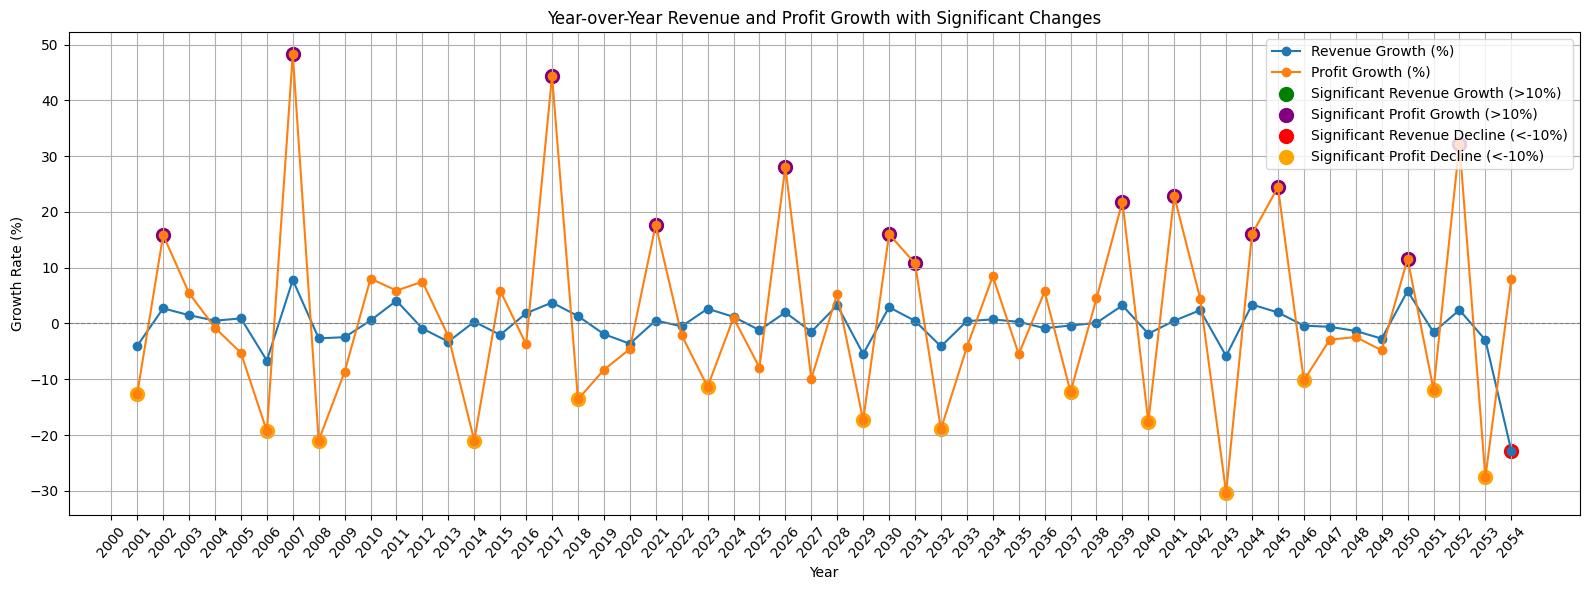

In [31]:
significant_revenue_decline_years = df_yearly[df_yearly['Revenue_Growth'] < -revenue_threshold]['Year']
significant_profit_decline_years = df_yearly[df_yearly['Profit_Growth'] < -profit_threshold]['Year']

# Visualize the year-over-year growth with significant change highlighted
plt.figure(figsize=(16, 6))
plt.plot(df_yearly['Year'], df_yearly['Revenue_Growth'], marker='o', label='Revenue Growth (%)')
plt.plot(df_yearly['Year'], df_yearly['Profit_Growth'], marker='o', label='Profit Growth (%)')

# Highlight significant growth periods
plt.scatter(significant_revenue_growth_years, df_yearly[df_yearly['Year'].isin(significant_revenue_growth_years)]['Revenue_Growth'], color='green', s=100, label=f'Significant Revenue Growth (>{revenue_threshold}%)')
plt.scatter(significant_profit_growth_years, df_yearly[df_yearly['Year'].isin(significant_profit_growth_years)]['Profit_Growth'], color='purple', s=100, label=f'Significant Profit Growth (>{profit_threshold}%)')

# Highlight significant decline periods
plt.scatter(significant_revenue_decline_years, df_yearly[df_yearly['Year'].isin(significant_revenue_decline_years)]['Revenue_Growth'], color='red', s=100, label=f'Significant Revenue Decline (<{-revenue_threshold}%)')
plt.scatter(significant_profit_decline_years, df_yearly[df_yearly['Year'].isin(significant_profit_decline_years)]['Profit_Growth'], color='orange', s=100, label=f'Significant Profit Decline (<{-profit_threshold}%)')


plt.title('Year-over-Year Revenue and Profit Growth with Significant Changes')
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(df_yearly['Year'])
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

Thresholds:

Significant Growth:

* Revenue Growth > 10% → Green Dots

* Profit Growth > 10% → Purple Dots

Significant Decline:

* Revenue Decline < -10% → Red Dots

* Profit Decline < -10% → Orange Dots

Additional Insights:

Spotting Critical Years: You can now easily identify years of major performance changes (e.g., 2007 and 2017 for profit spikes).

Profit is More Sensitive: There are more purple and orange dots than green and red, showing that profit is more sensitive to internal/external shocks than revenue.

Outlier Events:

* 2007 and 2017: Very high profit growth (~45–48%) without corresponding revenue spikes – possibly due to cost cuts, asset sales, or one-time events.

* 2043 and 2053: Significant revenue declines (red), possibly indicating market or operational downturns.

Correlation: There are years where revenue and profit move together (positive or negative), but also years where profit behaves very differently — indicating operational leverage or cost structure sensitivity.

**Financial Ratios and Insights**

In [27]:
df_financial['Profit Margin'] = df_financial['Profit'] / df_financial['Revenue'] * 100

In [28]:
df_financial['Debt to Asset Ratio'] = df_financial['Debt'] / df_financial['Assets']

In [29]:
df_financial['current ratio'] = df_financial['Assets'] / df_financial['Liabilities']

In [33]:
df_financial.head(10)

,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost,Year,Profit Margin,Debt to Asset Ratio,current ratio
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94,2000,37.987161,0.739596,1.010402
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62,2000,76.837094,0.105039,2.661725
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72,2000,43.074506,0.298658,2.256338
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27,2000,-35.508202,0.370356,1.679343
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48,2000,79.398576,0.197731,3.931202
5,2000-01-06,82623,38082,44541,46058,33548,56358,45233,9976,250,14531,27262.69,2000,53.908718,0.595266,1.245949
6,2000-01-07,95450,36891,58559,58694,35461,93846,69919,14467,436,2494,23230.71,2000,61.350445,0.377864,1.342210
7,2000-01-08,42299,56030,-13731,-8837,13014,124168,63997,15637,98,10589,44075.68,2000,-32.461760,0.104810,1.940216
8,2000-01-09,63585,77395,-13810,-12059,46942,136803,59912,6548,226,3336,59953.43,2000,-21.718959,0.343136,2.283399
9,2000-01-10,84044,65955,18089,21298,34884,124307,51064,7021,477,11710,45030.44,2000,21.523250,0.280628,2.434337
